In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read in the files
train = pd.read_csv('Train_UWu5bXk.csv')
test = pd.read_csv('Test_u94Q5KV.csv')

In [3]:
# Make copies of the train and test files
train_orig = train
test_orig = test

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [5]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
train.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [7]:
train['source'] = 'train'
test['source'] = 'test'

data = pd.concat([train,test], ignore_index=True, sort=False)

print(train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


In [8]:
#train.isnull().sum()
#OR
data.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [9]:
# We will ignore the null values in Outlet Sales column as they are to be predicted later
# The other two we will impute during data cleaning

In [10]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [11]:
# looking at the above data:
# We can confirm that there are missing values in Item Weight and Item Outlet Sales
# Outlet Establishment Year are 16.5 years range, converting to how old the store is, will help analysis more
# Item Visibility of 0 seems incorrect

In [12]:
data.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

In [13]:
data['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [14]:
data['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [15]:
data['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [16]:
data['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [17]:
# Get only the categorical variables
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x] == 'object']
categorical_columns

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'source']

In [18]:
# Remove the below three columns from the list (list.remove() works for only 1 value. So used a loop)
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier', 'Outlet_Identifier', 'source']]

In [19]:
categorical_columns

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [20]:
# Get frequencies for each categorical variable
for col in categorical_columns:
    print(data[col].value_counts())
    print("\n")    

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64


Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64


Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64


Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64


Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64




In [21]:
# CONCLUSIONS
# Item_Fat_Content - Regular and Low Fat Categories are labeled in multiple ways
# Item_Type - Products can be grouped under umbrella groups as a lot of them dont have substantial numbers
# Outlet_Size - Null values are skipped
# Outlet_Type - To see if type2 & type3 can be combined into a single group

In [22]:
# Data Cleaning
# Imputing missing values, treating outliers

In [23]:
# Imputing missing values in Item_Weight & Outlet_Size

#Determine the average weight per item:
item_avg_weight = data.groupby('Item_Identifier')['Item_Weight'].mean()
print(item_avg_weight)
#Using Pivot Table for the same
#item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')
#item_avg_weight

#Get a boolean variable specifying missing Item_Weight values
missing_bool = data['Item_Weight'].isnull()

#Impute data and check #missing values before and after imputation to confirm
print('Orignal #missing: {}'.format(sum(missing_bool)))

data.loc[missing_bool,'Item_Weight'] = data.loc[missing_bool,'Item_Identifier'].apply(lambda x: item_avg_weight[x])

print('Final #missing: {}'.format(data['Item_Weight'].isnull().sum()))

Item_Identifier
DRA12    11.600
DRA24    19.350
DRA59     8.270
DRB01     7.390
DRB13     6.115
DRB24     8.785
DRB25    12.300
DRB48    16.750
DRC01     5.920
DRC12    17.850
DRC13     8.260
DRC24    17.850
DRC25     5.730
DRC27    13.800
DRC36    13.000
DRC49     8.670
DRD01    12.100
DRD12     6.960
DRD13    15.000
DRD15    10.600
DRD24    13.850
DRD25     6.135
DRD27    18.750
DRD37     9.800
DRD49     9.895
DRD60    15.700
DRE01    10.100
DRE03    19.600
DRE12     4.590
DRE13     6.280
          ...  
NCX05    15.200
NCX06    17.600
NCX17    21.250
NCX18    14.150
NCX29    10.000
NCX30    16.700
NCX41    19.000
NCX42     6.360
NCX53    20.100
NCX54     9.195
NCY05    13.500
NCY06    15.250
NCY17    18.200
NCY18     7.285
NCY29    13.650
NCY30    20.250
NCY41    16.750
NCY42     6.380
NCY53    20.000
NCY54     8.430
NCZ05     8.485
NCZ06    19.600
NCZ17    12.150
NCZ18     7.825
NCZ29    15.000
NCZ30     6.590
NCZ41    19.850
NCZ42    10.500
NCZ53     9.600
NCZ54    14.650
Name: It

In [24]:
#Import mode function:
from scipy.stats import mode

total_missing_outlet_size = data['Outlet_Size'].isnull().sum() 
print('Total missing Outlet_Size = ' + str(total_missing_outlet_size)) # 4016

print('\nOutlet Identifiers with missing Size:') # 4016
print(data[data['Outlet_Size'].isnull()]['Outlet_Identifier'].value_counts())
# OUT017 & OUT045 are SuperMarkets1 and OUT010 is a GroceryStore
# Grocery Store have Outlet Size of only 'Small'
# Supermarket Type1 have Outlet Sizes of Small, Medium and High
# Supermarket Type2 & Supermarket Type3 only have 'Medium'

outlet_size_mode = data.pivot_table(columns='Outlet_Type', values='Outlet_Size', aggfunc=(lambda x: x.mode()))
#outlet_size_mode = data.groupby('Outlet_Type').apply(lambda x: x.mode()) #Type', values='Outlet_Size', aggfunc=(lambda x:mode(x).mode[0]))
print(np.transpose(outlet_size_mode))

missing_bool = data['Outlet_Size'].isnull()
#print(missing_bool)

#Impute data and check #missing values before and after imputation to confirm
print('Orignal #missing: {}'.format(sum(missing_bool)))

data.loc[missing_bool,'Outlet_Size'] = data.loc[missing_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

print('Final #missing: {}'.format(data['Outlet_Size'].isnull().sum()))

Total missing Outlet_Size = 4016

Outlet Identifiers with missing Size:
OUT045    1548
OUT017    1543
OUT010     925
Name: Outlet_Identifier, dtype: int64
                  Outlet_Size
Outlet_Type                  
Grocery Store           Small
Supermarket Type1       Small
Supermarket Type2      Medium
Supermarket Type3      Medium
Orignal #missing: 4016
Final #missing: 0


In [25]:
# FEATURE ENGINEERING
# If the avg sales of SuperMarket2 and SuperMarket3 are close, we can combine them
data.pivot_table(index='Outlet_Type', values='Item_Outlet_Sales')

#But they are different, so we will not combine them

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


In [26]:
# Modify Item Visibility
#visibility_avg = data.pivot_table(index='Item_Identifier', values='Item_Visibility', aggfunc='mean')
visibility_avg = data.groupby('Item_Identifier')['Item_Visibility'].mean()
#print(visibility_avg)
#print(visibility_avg.query('Item_Identifier == "DRA12"'))

missing_bool = (data['Item_Visibility']==0)
#print(missing_bool)

print('Count of Item_Visibility = 0 before updating: {}'.format(sum(data['Item_Visibility']==0)))
data.loc[missing_bool, 'Item_Visibility'] = data.loc[missing_bool, 'Item_Identifier'].apply(lambda x: visibility_avg[x])
print('Count of Item_Visibility = 0 after updating: {}'.format(sum(data['Item_Visibility']==0)))

Count of Item_Visibility = 0 before updating: 879
Count of Item_Visibility = 0 after updating: 0


In [27]:
# Lets look at the visibility of the product in that particular store as compared to the 
# mean visibility of that product across all stores
data['Item_Visibility_MeanRatio'] = data.apply(lambda x: x['Item_Visibility']/visibility_avg[x['Item_Identifier']], axis=1)
print(data['Item_Visibility_MeanRatio'].describe())

count    14204.000000
mean         1.061884
std          0.235907
min          0.844563
25%          0.925131
50%          0.999070
75%          1.042007
max          3.010094
Name: Item_Visibility_MeanRatio, dtype: float64


In [28]:
# Use the Item_Identifier variable to create a new column to hold Item Categories
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food', 'DR':'Drinks', 'NC':'Non-Consumable'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [29]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Visibility_MeanRatio,Item_Type_Combined
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,0.931078,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,0.933420,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,0.960069,Food
3,FDX07,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,train,1.000000,Food
4,NCD19,8.93,Low Fat,0.009780,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,1.000000,Non-Consumable


In [30]:
#Years:
data['Outlet_Years'] = 2019 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        21.169319
std          8.371664
min         10.000000
25%         15.000000
50%         20.000000
75%         32.000000
max         34.000000
Name: Outlet_Years, dtype: float64

In [31]:
data['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [32]:
# Fix the inconsistencies in 'Item_Fat_Content' column values
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat':'Low Fat'})
data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    4824
reg         195
Name: Item_Fat_Content, dtype: int64

In [33]:
# Just checking another way to do it
data['Item_Fat_Content'].replace({'reg':'Regular'}, inplace=True)
data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [34]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Visibility_MeanRatio,Item_Type_Combined,Outlet_Years
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,0.931078,Food,20
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,0.933420,Drinks,10
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,0.960069,Food,20
3,FDX07,19.200,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,train,1.000000,Food,21
4,NCD19,8.930,Low Fat,0.009780,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,1.000000,Non-Consumable,32
5,FDP36,10.395,Regular,0.057059,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,train,1.000000,Food,10
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,train,1.497197,Food,32
7,FDP10,19.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,train,0.870493,Food,34
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Small,Tier 2,Supermarket Type1,1076.5986,train,0.924160,Food,17
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Small,Tier 2,Supermarket Type1,4710.5350,train,0.963983,Food,12


In [35]:
#Mark non-consumables as separate category in low_fat
sum(data['Item_Type_Combined']=='Non-Consumable')
data.loc[data['Item_Type_Combined']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'

In [36]:
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [37]:
# Numerical and One-Hot Coding of Categorical variables
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])

var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']

for column in var_mod:
    data[column] = le.fit_transform(data[column])

In [38]:
#One Hot Coding
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined','Outlet'])

In [39]:
data.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,source,Item_Visibility_MeanRatio,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,train,0.931078,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,train,0.933420,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,train,0.960069,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,train,1.000000,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.009780,Household,53.8614,OUT013,1987,994.7052,train,1.000000,...,0,1,0,0,0,0,0,0,0,0


In [40]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Item_Visibility_MeanRatio    float64
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
O

In [41]:
data[['Item_Fat_Content_0','Item_Fat_Content_1','Item_Fat_Content_2']].head(10)

,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0
5,0,0,1
6,0,0,1
7,1,0,0
8,0,0,1
9,0,0,1


In [42]:
#Drop the columns which have been converted to different types:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

C:\Users\Shilpa\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [43]:
data

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,source,Item_Visibility_MeanRatio,Outlet_Years,Item_Fat_Content_0,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.300,0.016047,249.8092,OUT049,3735.1380,train,0.931078,20,1,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.920,0.019278,48.2692,OUT018,443.4228,train,0.933420,10,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.500,0.016760,141.6180,OUT049,2097.2700,train,0.960069,20,1,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.200,0.017834,182.0950,OUT010,732.3800,train,1.000000,21,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.930,0.009780,53.8614,OUT013,994.7052,train,1.000000,32,0,...,0,1,0,0,0,0,0,0,0,0
5,FDP36,10.395,0.057059,51.4008,OUT018,556.6088,train,1.000000,10,0,...,0,0,0,1,0,0,0,0,0,0
6,FDO10,13.650,0.012741,57.6588,OUT013,343.5528,train,1.497197,32,0,...,0,1,0,0,0,0,0,0,0,0
7,FDP10,19.000,0.127470,107.7622,OUT027,4022.7636,train,0.870493,34,1,...,0,0,0,0,0,1,0,0,0,0
8,FDH17,16.200,0.016687,96.9726,OUT045,1076.5986,train,0.924160,17,0,...,0,0,0,0,0,0,0,1,0,0
9,FDU28,19.200,0.094450,187.8214,OUT017,4710.5350,train,0.963983,12,0,...,0,0,1,0,0,0,0,0,0,0


In [44]:
train.head(5)

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Item_Visibility_MeanRatio,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,249.8092,OUT049,3735.1380,0.931078,20,1,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,48.2692,OUT018,443.4228,0.933420,10,0,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,141.6180,OUT049,2097.2700,0.960069,20,1,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.017834,182.0950,OUT010,732.3800,1.000000,21,0,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.009780,53.8614,OUT013,994.7052,1.000000,32,0,1,...,0,1,0,0,0,0,0,0,0,0


In [45]:
test.head(5)

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Visibility_MeanRatio,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
8523,FDW58,20.750,0.007565,107.8622,OUT049,1.029192,20,1,0,0,...,0,0,0,0,0,0,0,0,0,1
8524,FDW14,8.300,0.038428,87.3198,OUT017,1.130311,12,0,0,1,...,0,0,1,0,0,0,0,0,0,0
8525,NCN55,14.600,0.099575,241.7538,OUT010,1.735215,21,0,1,0,...,1,0,0,0,0,0,0,0,0,0
8526,FDQ58,7.315,0.015388,155.0340,OUT017,1.291577,12,1,0,0,...,0,0,1,0,0,0,0,0,0,0
8527,FDY38,13.600,0.118599,234.2300,OUT027,0.917824,34,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [46]:
# MODELLING
# Let us try 6 different types of modelling

In [47]:
# Mean Based
sales_avg = train['Item_Outlet_Sales'].mean()

#Define dataframe for ids for submission
base1 = test[['Item_Identifier','Outlet_Identifier']]
base1['Item_Outlet_Sales'] = sales_avg

#Export submission file
base1.to_csv('alg0.csv', index=False)

#Score for this is 1773.something

C:\Users\Shilpa\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [48]:
#Define target and ID columns
target = 'Item_Outlet_Sales'
IDCol = ['Item_Identifier','Outlet_Identifier']

from sklearn import cross_validation, metrics

def modelfit(alg, dtrain, dtest, predictors, target, IDCol, filename):
    # Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
    
    # Predict Training set
    dtrain_predictions = alg.predict(dtrain[predictors])
    
    # Perform cross validation
    cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain[target], cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
        
    #Print model report
    print("\nModel Report")
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    #Export submission file:
    IDCol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDCol})
    submission.to_csv(filename, index=False)

C:\Users\Shilpa\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)



Model Report
RMSE : 1128
CV Score : Mean - 1129 | Std - 43.5 | Min - 1074 | Max - 1213


C:\Users\Shilpa\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


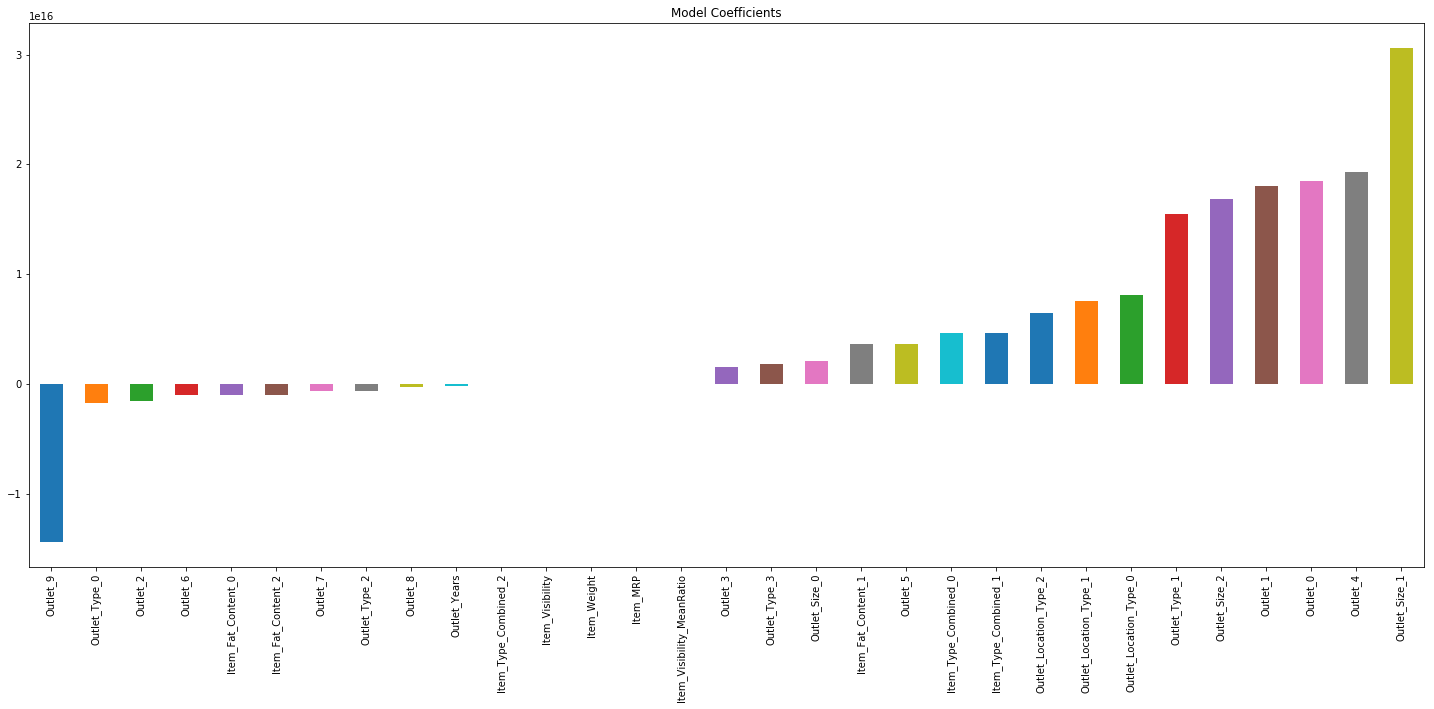

In [49]:
#Linear Regression Model
from sklearn.linear_model import LinearRegression, Ridge, Lasso

predictors = [x for x in train.columns if x not in [target]+IDCol]

# print predictors
alg1 = LinearRegression(normalize=True)
coef = modelfit(alg1, train, test, predictors, target, IDCol, 'alg1.csv')
coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients', figsize=(25,10))

# Score 1202


Model Report
RMSE : 1129
CV Score : Mean - 1130 | Std - 44.6 | Min - 1076 | Max - 1217


C:\Users\Shilpa\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


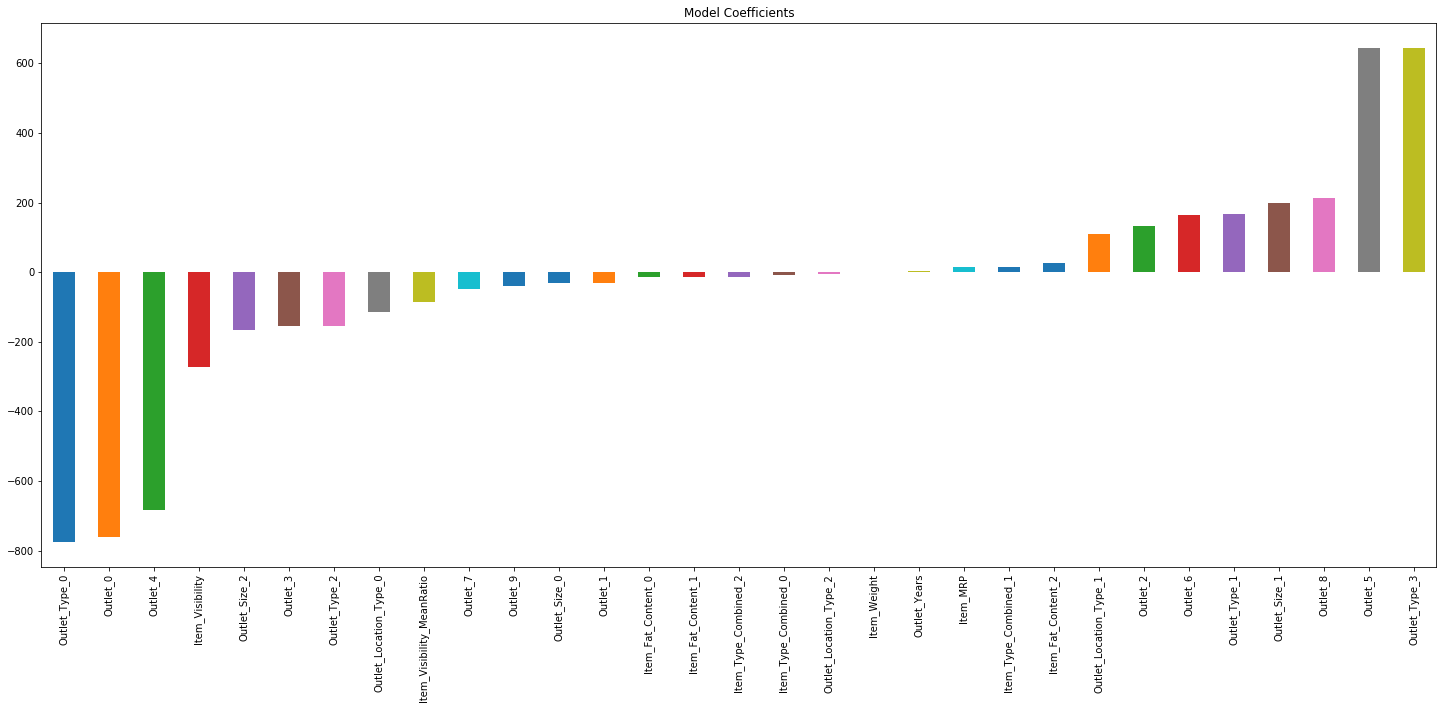

In [50]:
# Ridge Regression Model
predictors = [x for x in train.columns if x not in IDCol+[target]]
alg2 = Ridge(alpha=0.05, normalize=True)
modelfit(alg2, train, test, predictors, target, IDCol, 'alg2.csv')
coef2 = pd.Series(alg2.coef_, predictors).sort_values()
coef2.plot.bar(title='Model Coefficients', figsize=(25,10))

# Score = 1203.5230172473664


Model Report
RMSE : 1058
CV Score : Mean - 1091 | Std - 45.42 | Min - 1003 | Max - 1186


C:\Users\Shilpa\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


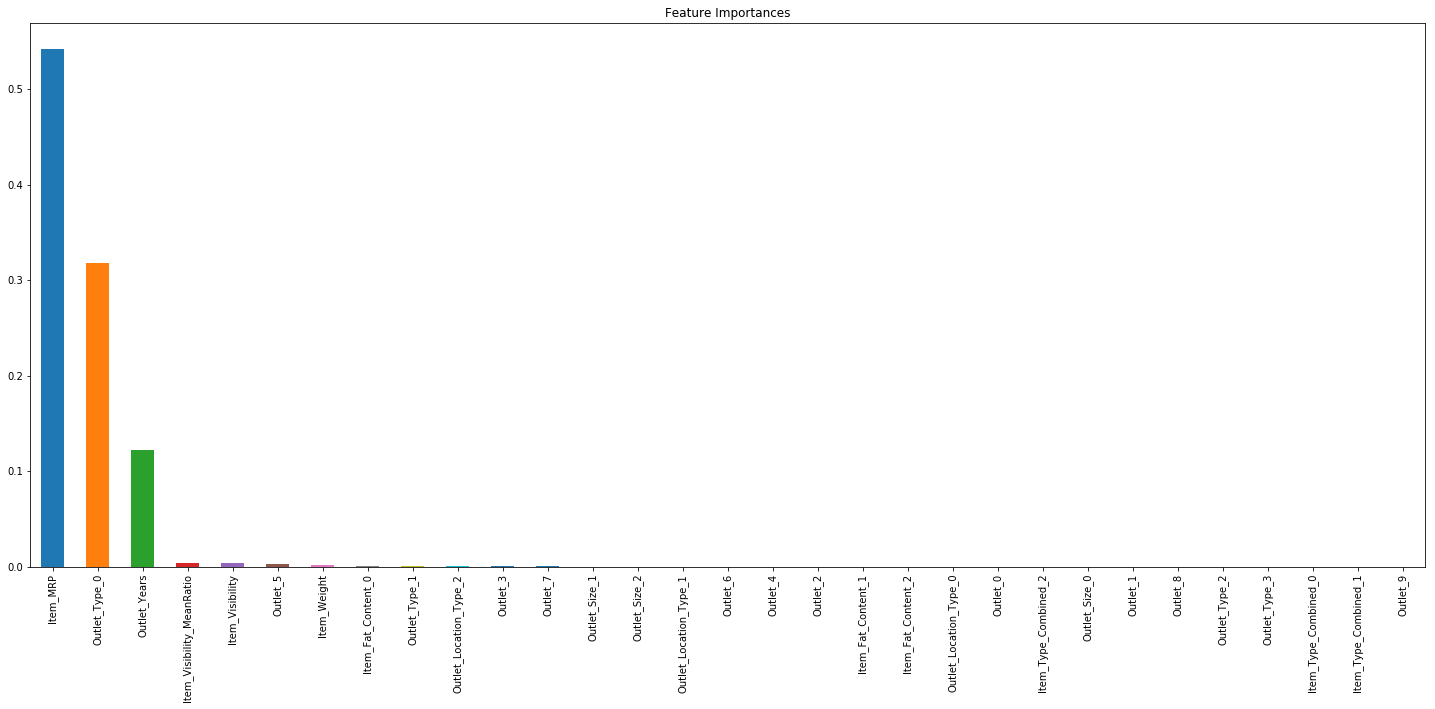

In [51]:
# Decision Tree Model
from sklearn.tree import DecisionTreeRegressor

predictors = [x for x in train.columns if x not in IDCol+[target]]

alg3 = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(alg3, train, test, predictors, target, IDCol, 'alg3.csv')
coef3 = pd.Series(alg3.feature_importances_, predictors).sort_values(ascending=False)
coef3.plot.bar(title='Feature Importances', figsize=(25, 10))

# Score is 1162


Model Report
RMSE : 1071
CV Score : Mean - 1096 | Std - 43.3 | Min - 1027 | Max - 1172


C:\Users\Shilpa\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


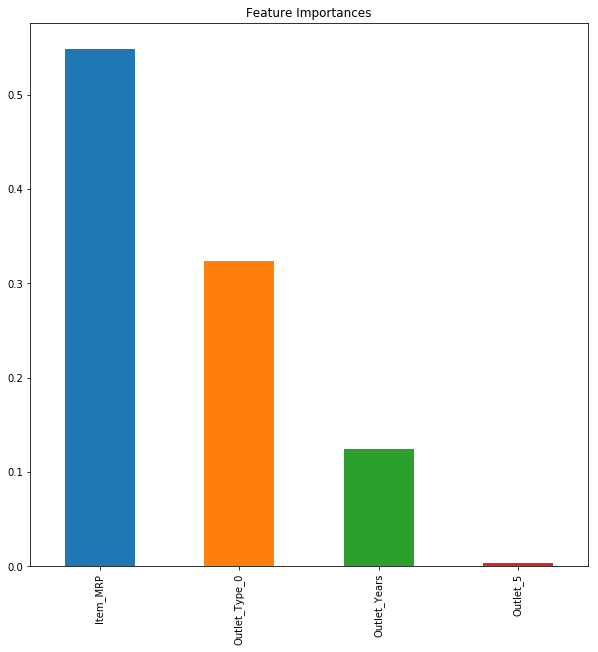

In [52]:
# The RMSE and Mean CV Error show that we are still overfitting. 
# So lets make decision tree with just 4 top features and a depth of 8 and leaves = 150
predictors = ['Item_MRP','Outlet_Type_0','Outlet_5','Outlet_Years']
alg4 = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
modelfit(alg4, train, test, predictors, target, IDCol, 'alg4.csv')
coef = pd.Series(alg4.feature_importances_, predictors).sort_values(ascending=False)
coef.plot.bar(figsize=(10,10), title='Feature Importances')

# Score - 1156.8916784509065


Model Report
RMSE : 1073
CV Score : Mean - 1084 | Std - 43.96 | Min - 1020 | Max - 1163


C:\Users\Shilpa\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


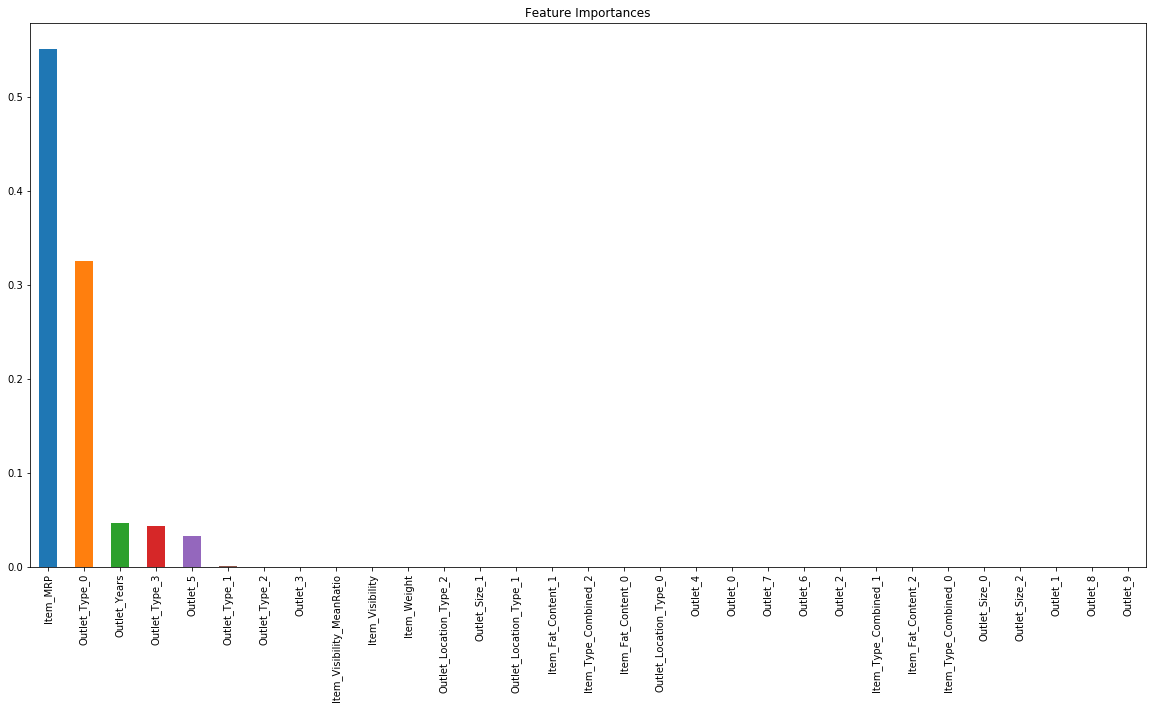

In [53]:
# Random Forest Model
from sklearn.ensemble import RandomForestRegressor

predictors = [x for x in train.columns if x not in IDCol+[target]]

alg5 = RandomForestRegressor(n_estimators=200, max_depth=5, min_samples_leaf=100, n_jobs=4)
modelfit(alg5, train, test, predictors, target, IDCol, 'alg5.csv')
coef5 = pd.Series(alg5.feature_importances_, predictors).sort_values(ascending=False)
coef5.plot.bar(title='Feature Importances', figsize=(20, 10))

# Score for this submission is : 1154.5118825445047.


Model Report
RMSE : 1068
CV Score : Mean - 1083 | Std - 43.81 | Min - 1019 | Max - 1162


C:\Users\Shilpa\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


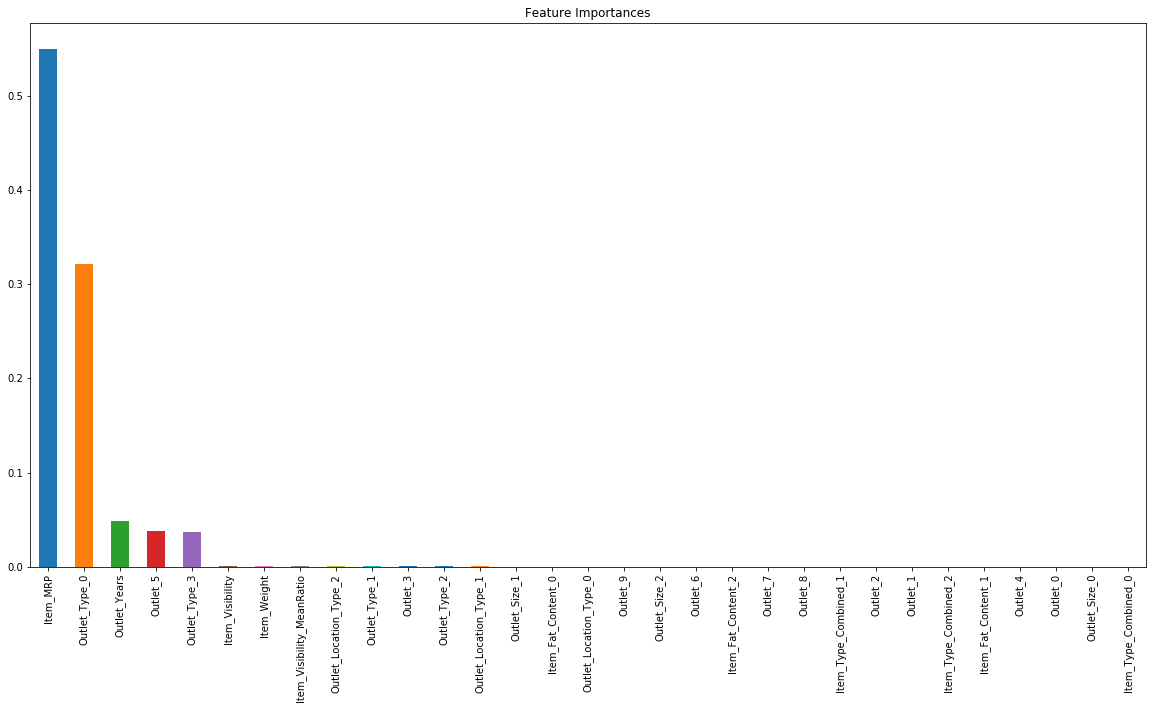

In [55]:
# Random Forest Model, trees = 400, depth = 6
predictors = [x for x in train.columns if x not in IDCol+[target]]

alg6 = RandomForestRegressor(n_estimators=400, max_depth=6, min_samples_leaf=100, n_jobs=4)
modelfit(alg6, train, test, predictors, target, IDCol, 'alg6.csv')
coef6 = pd.Series(alg6.feature_importances_, predictors).sort_values(ascending=False)
coef6.plot.bar(title='Feature Importances', figsize=(20, 10))

# Score for this submission is : 1153.0632167683295.

In [ ]:
# 
Public Leaderboard - Practice Problem: Big Mart Sales III
My Rank		620		Score	1153.0632167683